In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load reduced dataset (Step 2.3 output is best here)
train_df = pd.read_csv("heart_disease_reduced_train.csv")
test_df  = pd.read_csv("heart_disease_reduced_test.csv")

X = pd.concat([train_df.drop(columns=["target"]), test_df.drop(columns=["target"])], axis=0)
y = pd.concat([train_df["target"], test_df["target"]], axis=0)

print("Dataset shape for clustering:", X.shape)


Dataset shape for clustering: (920, 21)


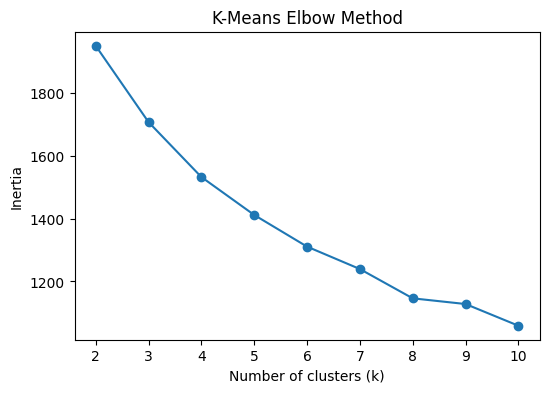

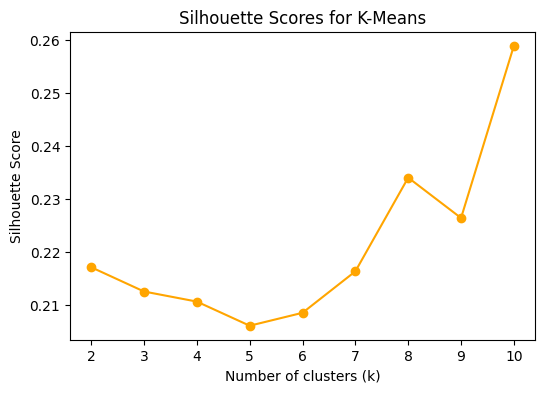

In [2]:
inertias = []
sils = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X, labels))

# Elbow plot
plt.figure(figsize=(6,4))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("K-Means Elbow Method")
plt.show()

# Silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K_range, sils, marker="o", color="orange")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means")
plt.show()


Cluster vs Actual Labels:
Actual     0    1
Cluster          
0         55  282
1        356  227


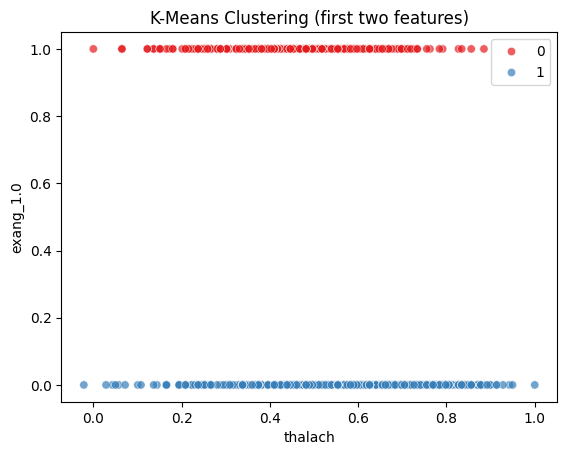

In [3]:
best_k = 2  # for heart disease, k=2 makes sense (disease vs no-disease)
km = KMeans(n_clusters=best_k, random_state=42, n_init=10)
clusters = km.fit_predict(X)

# Compare with true labels
ct = pd.crosstab(clusters, y, rownames=["Cluster"], colnames=["Actual"])
print("Cluster vs Actual Labels:")
print(ct)

sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=clusters, palette="Set1", alpha=0.7)
plt.title("K-Means Clustering (first two features)")
plt.show()


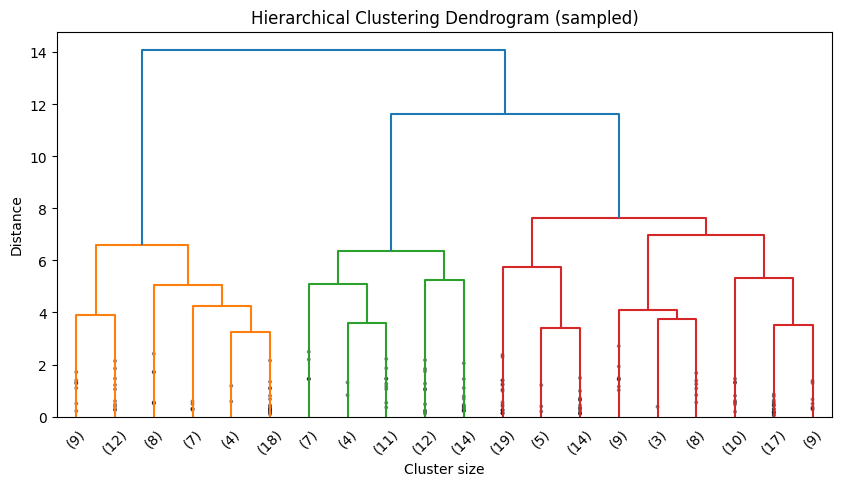

In [4]:
# Subsample for dendrogram (too many rows can be slow)
sample_X = X.sample(200, random_state=42)

Z = linkage(sample_X, method="ward")
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="lastp", p=20, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram (sampled)")
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()


In [6]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Ward uses Euclidean distance internally, no metric/affinity needed
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
hc_labels = hc.fit_predict(X)

ct_hc = pd.crosstab(hc_labels, y, rownames=["Cluster"], colnames=["Actual"])
print("Hierarchical Clustering vs Actual Labels:")
print(ct_hc)


Hierarchical Clustering vs Actual Labels:
Actual     0    1
Cluster          
0        340  188
1         71  321
